Target:
* Add dropout regularization with a probability of 10% after each layer (except the final layer) to reduce overfitting

Result:
* Max Train accuracy (in 15 epochs): 98.67%.
* Max test accuracy (in 15 epochs): 99%

Analysis:
*  The dropout has reduced the accuracy of both train and test which is expected. However the test accuracy is generally higher than train accuracy.
* I need to boost my trainset by adding data transformations and augmentations. I will include image rotation in the next iteration to try and improve train accuracy

In [1]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git pull

fatal: destination path 'ERA_V1' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git


Add all the imports

In [2]:
from __future__ import print_function
import sys
sys.path.append("ERA_V1/session_7")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from s7_utils import load_mnist_data, preview_batch_images, plot_statistics
from s7_model import Model_5_Net, model_summary, model_train, model_test

Allocate GPU

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
mnist_model = Model_5_Net().to(device)
model_summary(mnist_model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 10, 22, 22]             900
      BatchNorm2d-10           [-1, 10, 22, 22]              20
             ReLU-11           [-1, 10, 22, 22]               0
          Dropout-12           [-1, 10, 22, 22]               0
        MaxPool2d-13           [-1, 10, 11, 11]               0
           Conv2d-14             [-1, 1

Define Transforms

In [4]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

Download Data

In [5]:
train_data, test_data = load_mnist_data(train_transforms, test_transforms)

Define train and test loaders

In [6]:
torch.manual_seed(1)
batch_size = 128
kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle = True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, **kwargs)

Preview data

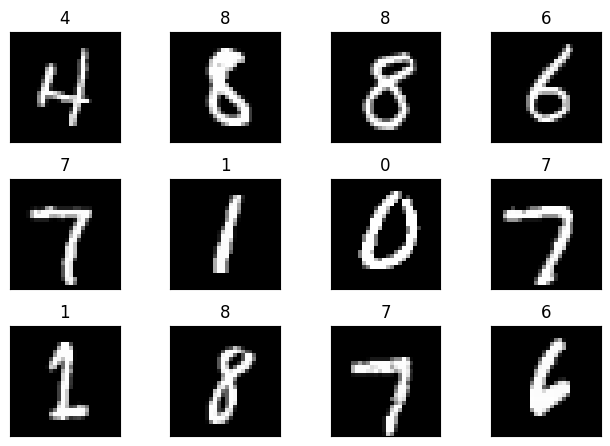

In [7]:
preview_batch_images(train_loader)

In [8]:
model = Model_5_Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1,20):
    print(f"epoch: {epoch}")
    model_train(model, device, train_loader, optimizer, train_acc, train_losses)
    model_test(model, device, test_loader, test_acc, test_losses)
    scheduler.step()


Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 1


loss=0.31860968470573425 batch_id=468 Accuracy = 89.00: 100%|██████████| 469/469 [00:21<00:00, 22.24it/s]



Test set: Average loss: 0.1512, Accuracy: 9738/10000 (97.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 2


loss=0.20368677377700806 batch_id=468 Accuracy = 96.73: 100%|██████████| 469/469 [00:16<00:00, 27.74it/s]



Test set: Average loss: 0.0948, Accuracy: 9799/10000 (97.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 3


loss=0.05127942934632301 batch_id=468 Accuracy = 97.48: 100%|██████████| 469/469 [00:17<00:00, 26.43it/s]



Test set: Average loss: 0.0636, Accuracy: 9848/10000 (98.48%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 4


loss=0.0647740438580513 batch_id=468 Accuracy = 97.77: 100%|██████████| 469/469 [00:18<00:00, 25.47it/s]



Test set: Average loss: 0.0590, Accuracy: 9863/10000 (98.63%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 5


loss=0.07252509146928787 batch_id=468 Accuracy = 97.99: 100%|██████████| 469/469 [00:16<00:00, 27.76it/s]



Test set: Average loss: 0.0512, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 6


loss=0.07909584790468216 batch_id=468 Accuracy = 98.17: 100%|██████████| 469/469 [00:18<00:00, 25.93it/s]



Test set: Average loss: 0.0466, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 7


loss=0.07326260209083557 batch_id=468 Accuracy = 98.29: 100%|██████████| 469/469 [00:17<00:00, 27.31it/s]



Test set: Average loss: 0.0400, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 8


loss=0.06358680874109268 batch_id=468 Accuracy = 98.35: 100%|██████████| 469/469 [00:18<00:00, 25.29it/s]



Test set: Average loss: 0.0464, Accuracy: 9871/10000 (98.71%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 9


loss=0.08255831897258759 batch_id=468 Accuracy = 98.36: 100%|██████████| 469/469 [00:17<00:00, 26.90it/s]



Test set: Average loss: 0.0370, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 10


loss=0.06580323725938797 batch_id=468 Accuracy = 98.54: 100%|██████████| 469/469 [00:18<00:00, 25.90it/s]



Test set: Average loss: 0.0416, Accuracy: 9885/10000 (98.85%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 11


loss=0.12147381156682968 batch_id=468 Accuracy = 98.62: 100%|██████████| 469/469 [00:17<00:00, 26.66it/s]



Test set: Average loss: 0.0328, Accuracy: 9907/10000 (99.07%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 12


loss=0.03946089372038841 batch_id=468 Accuracy = 98.72: 100%|██████████| 469/469 [00:17<00:00, 27.22it/s]



Test set: Average loss: 0.0313, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 13


loss=0.04802461341023445 batch_id=468 Accuracy = 98.74: 100%|██████████| 469/469 [00:17<00:00, 26.91it/s]



Test set: Average loss: 0.0320, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 14


loss=0.07931844890117645 batch_id=468 Accuracy = 98.82: 100%|██████████| 469/469 [00:16<00:00, 28.00it/s]



Test set: Average loss: 0.0311, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 15


loss=0.042448267340660095 batch_id=468 Accuracy = 98.80: 100%|██████████| 469/469 [00:19<00:00, 24.37it/s]



Test set: Average loss: 0.0303, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 16


loss=0.06178077682852745 batch_id=468 Accuracy = 98.76: 100%|██████████| 469/469 [00:17<00:00, 27.22it/s]



Test set: Average loss: 0.0297, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 17


loss=0.006721088662743568 batch_id=468 Accuracy = 98.76: 100%|██████████| 469/469 [00:18<00:00, 25.53it/s]



Test set: Average loss: 0.0323, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 18


loss=0.08258993923664093 batch_id=468 Accuracy = 98.78: 100%|██████████| 469/469 [00:17<00:00, 27.18it/s]



Test set: Average loss: 0.0338, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 19


loss=0.09234774857759476 batch_id=468 Accuracy = 98.88: 100%|██████████| 469/469 [00:18<00:00, 25.71it/s]



Test set: Average loss: 0.0299, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-03.


Plot Statistics

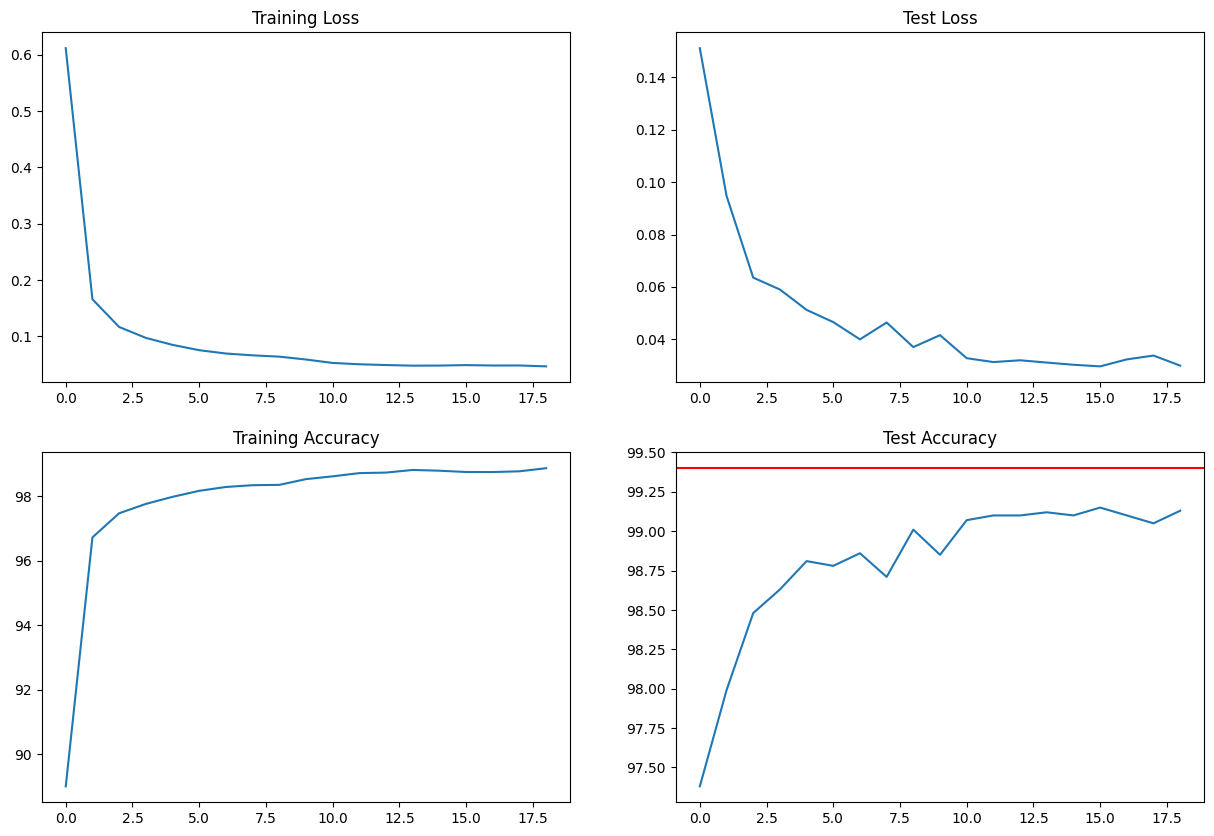

In [9]:
plot_statistics(train_losses, train_acc, test_losses, test_acc)